In [1]:
import numpy as np
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
class LinearRegressor():

    def fit(self, X, y):
        self.w = (np.linalg.inv(X.T @ X) @ X.T) @ y
        
    def predict(self, X):
        return X @ self.w

In [3]:
data = load_boston()
X = data['data']
Y = data['target']
X = np.hstack((np.ones(len(X)).reshape(-1,1), X))

X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [4]:
lin_reg = LinearRegressor()
lin_reg.fit(X_train, y_train)

In [5]:
train_pred = lin_reg.predict(X_train)
test_pred = lin_reg.predict(X_test)

**Метрики**

Метрики на трейне:

In [6]:
mean_absolute_error(train_pred,y_train)

3.329321110978483

In [7]:
mean_squared_error(train_pred,y_train)

23.246784426994665

In [8]:
r2_score(train_pred,y_train)

0.642833280575863

Метрики на тесте:

In [9]:
mean_absolute_error(test_pred,y_test)

3.188043206755824

In [10]:
mean_squared_error(test_pred,y_test)

18.38237082381088

In [11]:
r2_score(test_pred,y_test)

0.6913284794836049

**Визуализация ошибок**

train

In [12]:
err_train = train_pred - y_train

/Users/baduk/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00374686, 0.00187343, 0.        , 0.        , 0.        ,
        0.        , 0.00187343, 0.00187343, 0.00187343, 0.00936715,
        0.00374686, 0.00562029, 0.01124058, 0.01498743, 0.02248115,
        0.03372173, 0.04683573, 0.05807631, 0.12739319, 0.11427918,
        0.10303861, 0.07306374, 0.04870916, 0.01686086, 0.00187343,
        0.00187343, 0.00374686, 0.        , 0.        , 0.00187343]),
 array([-26.25786572, -24.84947387, -23.44108201, -22.03269015,
        -20.62429829, -19.21590643, -17.80751457, -16.39912271,
        -14.99073085, -13.58233899, -12.17394714, -10.76555528,
         -9.35716342,  -7.94877156,  -6.5403797 ,  -5.13198784,
         -3.72359598,  -2.31520412,  -0.90681227,   0.50157959,
          1.90997145,   3.31836331,   4.72675517,   6.13514703,
          7.54353889,   8.95193075,  10.36032261,  11.76871446,
         13.17710632,  14.58549818,  15.99389004]),
 <a list of 30 Patch objects>)

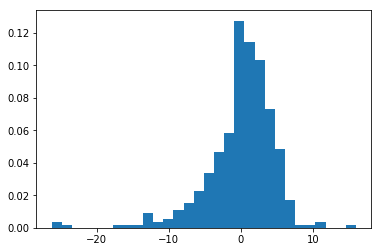

In [13]:
plt.hist(err_train, normed=True, bins=30)

In [14]:
stats.kstest(err_train, 'norm')

KstestResult(statistic=0.3349965141493719, pvalue=0.0)

In [15]:
stats.anderson(err_train, dist='norm')

AndersonResult(statistic=9.067898189579807, critical_values=array([0.57 , 0.649, 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

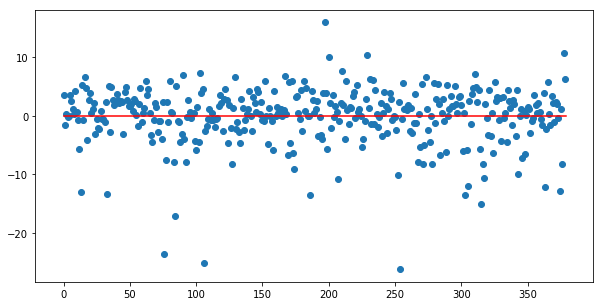

In [16]:
plt.figure(figsize=(10,5))
plt.plot([0,len(err_train)], [0,0], c='r')
plt.scatter(np.arange(len(err_train)), err_train)
plt.show()

test

In [17]:
err_test = test_pred - y_test

(array([0.00995231, 0.        , 0.        , 0.        , 0.00995231,
        0.00995231, 0.        , 0.00995231, 0.00995231, 0.00995231,
        0.00995231, 0.01990461, 0.00995231, 0.00995231, 0.03980922,
        0.05971383, 0.06966614, 0.02985692, 0.04976153, 0.05971383,
        0.08957075, 0.16918919, 0.05971383, 0.14928458, 0.11942766,
        0.06966614, 0.05971383, 0.05971383, 0.03980922, 0.02985692]),
 array([-16.88149372, -16.09031866, -15.29914359, -14.50796852,
        -13.71679345, -12.92561838, -12.13444332, -11.34326825,
        -10.55209318,  -9.76091811,  -8.96974305,  -8.17856798,
         -7.38739291,  -6.59621784,  -5.80504277,  -5.01386771,
         -4.22269264,  -3.43151757,  -2.6403425 ,  -1.84916744,
         -1.05799237,  -0.2668173 ,   0.52435777,   1.31553284,
          2.1067079 ,   2.89788297,   3.68905804,   4.48023311,
          5.27140818,   6.06258324,   6.85375831]),
 <a list of 30 Patch objects>)

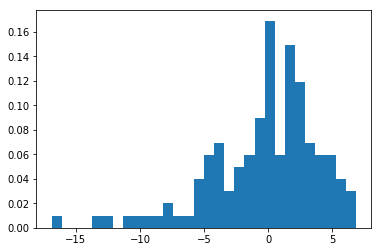

In [18]:
plt.hist(err_test, normed=True, bins=30)

In [19]:
stats.kstest(err_test, 'norm')

KstestResult(statistic=0.3310554540501651, pvalue=6.632472349110685e-13)

In [20]:
stats.anderson(err_test, dist='norm')

AndersonResult(statistic=2.1235735237800952, critical_values=array([0.559, 0.637, 0.764, 0.891, 1.06 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

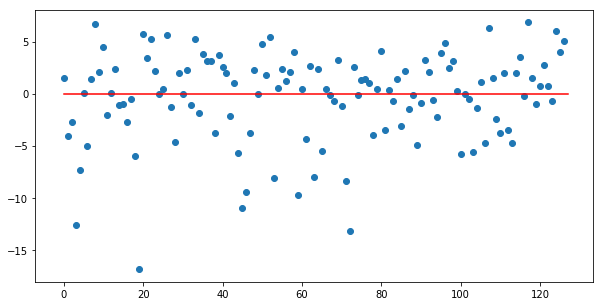

In [21]:
plt.figure(figsize=(10,5))
plt.plot([0,len(err_test)], [0,0], c='r')
plt.scatter(np.arange(len(err_test)), err_test)
plt.show()